# Setup

In [1]:
# Import libs
import pandas as pd
import json as json
from pandas import json_normalize
import os
pd.set_option('display.max_columns', None)
from datetime import datetime

# Loading Data

In [2]:
# Read first container data
srcDir = '../data/raw/'
string = open(srcDir+'70b3d500700016dA.txt','r').read()
normalized_df = json_normalize(json.loads(string)[1])


data = []
df_all = pd.DataFrame(columns=normalized_df.columns)

for filename in os.listdir(srcDir):
    if filename.endswith(".txt"): 
        print(os.path.join(srcDir, filename))
        string = open(srcDir+filename,'r').read()
        jsonData = json.loads(string)
        df_all = df_all.append(json_normalize(jsonData[1]))   
        
df_all = df_all.reset_index(drop=True)

#Commented out because we can ignore decoded_data.gws_data.gws 
"""
def flatten_nested_json_df(df):

    df = df.reset_index()

    print(f"original shape: {df.shape}")
    print(f"original columns: {df.columns}")


    # search for columns to explode/flatten
    s = (df.applymap(type) == list).all()
    list_columns = s[s].index.tolist()

    s = (df.applymap(type) == dict).all()
    dict_columns = s[s].index.tolist()

    print(f"lists: {list_columns}, dicts: {dict_columns}")
    while len(list_columns) > 0 or len(dict_columns) > 0:
        new_columns = []

        for col in dict_columns:
            print(f"flattening: {col}")
            # explode dictionaries horizontally, adding new columns
            horiz_exploded = pd.json_normalize(df[col]).add_prefix(f'{col}.')
            horiz_exploded.index = df.index
            df = pd.concat([df, horiz_exploded], axis=1).drop(columns=[col])
            new_columns.extend(horiz_exploded.columns) # inplace

        for col in list_columns:
            print(f"exploding: {col}")
            # explode lists vertically, adding new columns
            df = df.drop(columns=[col]).join(df[col].explode().to_frame())
            new_columns.append(col)

        # check if there are still dict o list fields to flatten
        s = (df[new_columns].applymap(type) == list).all()
        list_columns = s[s].index.tolist()

        s = (df[new_columns].applymap(type) == dict).all()
        dict_columns = s[s].index.tolist()

        print(f"lists: {list_columns}, dicts: {dict_columns}")

    print(f"final shape: {df.shape}")
    print(f"final columns: {df.columns}")
    return df

df_all = flatten_nested_json_df(df_all)
"""

../data/raw/70b3d500700016dA.txt
../data/raw/70b3d500700016dE.txt
../data/raw/70b3d500700016dF.txt
../data/raw/70b3d500700016E0.txt
../data/raw/70b3d500700016E5.txt
../data/raw/70b3d500700016E6.txt
../data/raw/70b3d500700016E7.txt
../data/raw/70b3d500700016EB.txt
../data/raw/70b3d500700016EE.txt
../data/raw/70b3d500700016F1.txt
../data/raw/70b3d500700016F2.txt
../data/raw/70b3d500700016F4.txt
../data/raw/70b3d500700016F6.txt
../data/raw/70b3d500700016F7.txt
../data/raw/70b3d500700016FA.txt
../data/raw/70b3d500700016FC.txt
../data/raw/70b3d50070001700.txt
../data/raw/70b3d50070001701.txt
../data/raw/70b3d50070001704.txt
../data/raw/70b3d50070001706.txt
../data/raw/70b3d50070001708.txt
../data/raw/70b3d50070001709.txt
../data/raw/70b3d5007000170F.txt
../data/raw/70b3d50070001710.txt
../data/raw/70b3d50070001712.txt
../data/raw/70b3d50070001713.txt
../data/raw/70b3d50070001714.txt
../data/raw/70b3d50070001715.txt
../data/raw/70b3d50070001716.txt
../data/raw/70b3d5007000171A.txt
../data/ra

'\ndef flatten_nested_json_df(df):\n\n    df = df.reset_index()\n\n    print(f"original shape: {df.shape}")\n    print(f"original columns: {df.columns}")\n\n\n    # search for columns to explode/flatten\n    s = (df.applymap(type) == list).all()\n    list_columns = s[s].index.tolist()\n\n    s = (df.applymap(type) == dict).all()\n    dict_columns = s[s].index.tolist()\n\n    print(f"lists: {list_columns}, dicts: {dict_columns}")\n    while len(list_columns) > 0 or len(dict_columns) > 0:\n        new_columns = []\n\n        for col in dict_columns:\n            print(f"flattening: {col}")\n            # explode dictionaries horizontally, adding new columns\n            horiz_exploded = pd.json_normalize(df[col]).add_prefix(f\'{col}.\')\n            horiz_exploded.index = df.index\n            df = pd.concat([df, horiz_exploded], axis=1).drop(columns=[col])\n            new_columns.extend(horiz_exploded.columns) # inplace\n\n        for col in list_columns:\n            print(f"exploding

# Drop unwanted cols

In [3]:
df_all_reduced = df_all.copy()

# Dopplungen
df_all_reduced.drop('unix_time', 1, inplace=True) # Dopplung - Wir nutzen created_at
df_all_reduced.drop('decoded_data.sensor_data.Sensor ID', 1, inplace=True) # Dopplung - wir nutzen DEVEUI
df_all_reduced.drop('decoded_data.gws_data.EUI', 1, inplace=True) # Dopplung - wir nutzen DEVEUI
df_all_reduced.drop('decoded_data.sensor_data.Height 2', 1, inplace=True) # Dopplung - wir nutzen Height 1
df_all_reduced.drop('decoded_data.sensor_data.Height 3', 1, inplace=True) # Dopplung - wir nutzen Height 1
df_all_reduced.drop('decoded_data.sensor_data.Height 4', 1, inplace=True) # Dopplung - wir nutzen Height 1

# Technische Sensordaten
df_all_reduced.drop('decoded_data.sensor_data.Status', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.sensor_data.Voltage', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.sensor_data.Messagetype', 1, inplace=True) # Q/A Irrelevant

# gws_data
df_all_reduced.drop('decoded_data.gws_data.cmd', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.seqno', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.ts', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.fcnt', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.port', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.freq', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.toa', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.dr', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.ack', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.gws', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.bat', 1, inplace=True) # Q/A Irrelevant
df_all_reduced.drop('decoded_data.gws_data.data', 1, inplace=True) # Q/A Irrelevant

# Sonstiges
df_all_reduced.drop('client_id', 1, inplace=True) # Q/A Irrelevant

In [4]:
df_all

,id,deveui,unix_time,client_id,created_at,decoded_data.sensor_data.Status,decoded_data.sensor_data.Sensor ID,decoded_data.sensor_data.Events,decoded_data.sensor_data.Height 1,decoded_data.sensor_data.Height 2,decoded_data.sensor_data.Height 3,decoded_data.sensor_data.Height 4,decoded_data.sensor_data.Voltage,decoded_data.sensor_data.Temperature,decoded_data.sensor_data.Tilt,decoded_data.sensor_data.Tx Event,decoded_data.sensor_data.Messagetype,decoded_data.gws_data.cmd,decoded_data.gws_data.seqno,decoded_data.gws_data.EUI,decoded_data.gws_data.ts,decoded_data.gws_data.fcnt,decoded_data.gws_data.port,decoded_data.gws_data.freq,decoded_data.gws_data.toa,decoded_data.gws_data.dr,decoded_data.gws_data.ack,decoded_data.gws_data.gws,decoded_data.gws_data.bat,decoded_data.gws_data.data
0,4110576,70B3D500700016DA,1620498360377,FES Receiver,2021-05-08 20:26:00.596017,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3620 mV,14 C,1 Degree,193 Times,1.1.1.1,gw,1949379,70B3D500700016DA,1620498360377,4097,2,867500000,123,SF8 BW125 4/5,False,"[{'rssi': -105, 'snr': 4.5, 'ts': 162049836037...",254,ffff22b8da1600700138383838700e01c1
1,4110093,70B3D500700016DA,1620494765501,FES Receiver,2021-05-08 19:26:05.713448,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,112 cm,112 cm,3620 mV,17 C,1 Degree,192 Times,1.1.1.1,gw,1949154,70B3D500700016DA,1620494765501,4096,2,868100000,71,SF7 BW125 4/5,False,"[{'rssi': -110, 'snr': 1, 'ts': 1620494765501,...",254,ffff22b8da1600700138383838701101c0
2,4109607,70B3D500700016DA,1620491158880,FES Receiver,2021-05-08 18:25:59.323267,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,108 cm,108 cm,108 cm,108 cm,3630 mV,15 C,0 Degree,191 Times,1.1.1.1,gw,1948925,70B3D500700016DA,1620491158880,4095,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -107, 'snr': 7.5, 'ts': 162049115888...",254,ffff22b8da1600700136363636710f00bf
3,4109118,70B3D500700016DA,1620487559091,FES Receiver,2021-05-08 17:25:59.523137,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,126 cm,126 cm,126 cm,126 cm,3630 mV,19 C,1 Degree,190 Times,1.1.1.1,gw,1948694,70B3D500700016DA,1620487559091,4094,2,867500000,71,SF7 BW125 4/5,False,"[{'rssi': -102, 'snr': 5, 'ts': 1620487559091,...",254,ffff22b8da160070013f3f3f3f711301be
4,4108627,70B3D500700016DA,1620483959154,FES Receiver,2021-05-08 16:25:59.577446,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,118 cm,118 cm,118 cm,118 cm,3630 mV,20 C,0 Degree,189 Times,1.1.1.1,gw,1948456,70B3D500700016DA,1620483959154,4093,2,867900000,71,SF7 BW125 4/5,False,"[{'rssi': -113, 'snr': 5.2, 'ts': 162048395916...",254,ffff22b8da160070013b3b3b3b711400bd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515032,598759,70B3D50070001789,1588992614891,hi3,2020-05-09 04:50:15.056761,"[SS, Standalone, version_184]",70001789,SENS_EVENT_MEASURE,104 cm,104 cm,104 cm,104 cm,3620 mV,19 C,5 Degree,142 Times,NaN,gw,276232,70B3D50070001789,1588992614891,1928,2,867900000,905,SF11 BW125 4/5,False,"[{'rssi': -117, 'snr': -6.8, 'ts': 15889926148...",254,ffff22b88917007001343434347013058e
515033,598510,70B3D50070001789,1588989015087,hi3,2020-05-09 03:50:15.256986,"[SS, Standalone, version_184]",70001789,SENS_EVENT_MEASURE,104 cm,104 cm,104 cm,104 cm,3620 mV,19 C,4 Degree,141 Times,NaN,gw,276121,70B3D50070001789,1588989015087,1927,2,868500000,905,SF11 BW125 4/5,False,"[{'rssi': -119, 'snr': -9.5, 'ts': 15889890150...",254,ffff22b88917007001343434347013048d
515034,598261,70B3D50070001789,1588985415234,hi3,2020-05-09 02:50:15.408009,"[SS, Standalone, version_184]",70001789,SENS_EVENT_MEASURE,104 cm,104 cm,104 cm,104 cm,3630 mV,19 C,5 Degree,140 Times,NaN,gw,276009,70B3D50070001789,1588985415234,1926,2,868300000,905,SF11 BW125 4/5,False,"[{'rssi': -107, 'snr': -15, 'ts': 158898541523...",254,ffff22b88917007001343434347113058c
515035,598017,70B3D50070001789,1588981815380,hi3,2020

In [5]:
df_all_reduced

,id,deveui,created_at,decoded_data.sensor_data.Events,decoded_data.sensor_data.Height 1,decoded_data.sensor_data.Temperature,decoded_data.sensor_data.Tilt,decoded_data.sensor_data.Tx Event
0,4110576,70B3D500700016DA,2021-05-08 20:26:00.596017,SENS_EVENT_MEASURE,112 cm,14 C,1 Degree,193 Times
1,4110093,70B3D500700016DA,2021-05-08 19:26:05.713448,SENS_EVENT_MEASURE,112 cm,17 C,1 Degree,192 Times
2,4109607,70B3D500700016DA,2021-05-08 18:25:59.323267,SENS_EVENT_MEASURE,108 cm,15 C,0 Degree,191 Times
3,4109118,70B3D500700016DA,2021-05-08 17:25:59.523137,SENS_EVENT_MEASURE,126 cm,19 C,1 Degree,190 Times
4,4108627,70B3D500700016DA,2021-05-08 16:25:59.577446,SENS_EVENT_MEASURE,118 cm,20 C,0 Degree,189 Times
...,...,...,...,...,...,...,...,...
515032,598759,70B3D50070001789,2020-05-09 04:50:15.056761,SENS_EVENT_MEASURE,104 cm,19 C,5 Degree,142 Times
515033,598510,70B3D50070001789,2020-05-09 03:50:15.256986,SENS_EVENT_MEASURE,104 cm,19 C,4 Degree,141 Times
515034,598261,70B3D50070001789,2020-05-09 02:50:15.408009,SENS_EVENT_MEASURE,104 cm,19 C,5 Degree,140 Times
515035,598017,70B3D50070001789,2020-05-09 01:50:15.558981,SENS_EVENT_MEASURE,86 cm,19 C,5 Degree,139 Times


# Standardize Data

Hier passe ich Datentypen an. 

Btw.: Object ist in Pandas äquivalent zu String bzw mixed Datatypes.

- created_at --> datetime64
- decoded_data.sensor_data.Height 1 --> CUT and INT
- decoded_data.sensor_data.Temperature --> CUT and INT
- decoded_data.sensor_data.Tilt --> CUT and INT
- decoded_data.sensor_data.Tx Event --> CUT and INT

In [6]:
df_all_reduced["created_at"] = pd.to_datetime(df_all_reduced['created_at'])
df_all_reduced['decoded_data.sensor_data.Height 1'] = df_all_reduced['decoded_data.sensor_data.Height 1'].str.split(' ').str[0].astype(int)
df_all_reduced['decoded_data.sensor_data.Temperature'] = df_all_reduced['decoded_data.sensor_data.Temperature'].str.split(' ').str[0].astype(int)
df_all_reduced['decoded_data.sensor_data.Tilt'] = df_all_reduced['decoded_data.sensor_data.Tilt'].str.split(' ').str[0].astype(int)
df_all_reduced['decoded_data.sensor_data.Tx Event'] = df_all_reduced['decoded_data.sensor_data.Tx Event'].str.split(' ').str[0].astype(int)

In [7]:
df_all_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515037 entries, 0 to 515036
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   id                                    515037 non-null  object        
 1   deveui                                515037 non-null  object        
 2   created_at                            515037 non-null  datetime64[ns]
 3   decoded_data.sensor_data.Events       515037 non-null  object        
 4   decoded_data.sensor_data.Height 1     515037 non-null  int32         
 5   decoded_data.sensor_data.Temperature  515037 non-null  int32         
 6   decoded_data.sensor_data.Tilt         515037 non-null  int32         
 7   decoded_data.sensor_data.Tx Event     515037 non-null  int32         
dtypes: datetime64[ns](1), int32(4), object(3)
memory usage: 23.6+ MB


# Check for Missing Data

In [8]:
print(df_all_reduced["id"].isnull().values.any())
print(df_all_reduced["deveui"].isnull().values.any())
print(df_all_reduced["created_at"].isnull().values.any())
print(df_all_reduced["decoded_data.sensor_data.Events"].isnull().values.any())
print(df_all_reduced["decoded_data.sensor_data.Height 1"].isnull().values.any())
print(df_all_reduced["decoded_data.sensor_data.Temperature"].isnull().values.any())
print(df_all_reduced["decoded_data.sensor_data.Tilt"].isnull().values.any())
print(df_all_reduced["decoded_data.sensor_data.Tx Event"].isnull().values.any())

False
False
False
False
False
False
False
False


Wir haben keine Null values. **Nice**.

# Check for Invalid Data

Do we have duplicates?

In [9]:
print(df_all_reduced["id"].duplicated().any())

False


# Outliers

Are the data ranges valid? --> Muss für Preprocessing nicht zwingend berücksichtigt werden, da wir Outliers ja separat behandeln. Ist aber nach dem Schritt Data-Cleaning deutlich einfacher, da wir weniger Spalten haben und Datentypen definiert haben.

In [10]:
print("ID is between", df_all_reduced["id"].min(), "and", df_all_reduced["id"].max())
print("deveui is between", df_all_reduced["deveui"].min(), "and", df_all_reduced["deveui"].max())
print("created_at is between", df_all_reduced["created_at"].min(), "and", df_all_reduced["created_at"].max())
print("decoded_data.sensor_data.Events is between", df_all_reduced["decoded_data.sensor_data.Events"].min(), "and", df_all_reduced["decoded_data.sensor_data.Events"].max())
print("decoded_data.sensor_data.Height 1 is between", df_all_reduced["decoded_data.sensor_data.Height 1"].min(), "and", df_all_reduced["decoded_data.sensor_data.Height 1"].max())
print("decoded_data.sensor_data.Temperature is between", df_all_reduced["decoded_data.sensor_data.Temperature"].min(), "and", df_all_reduced["decoded_data.sensor_data.Temperature"].max())
print("decoded_data.sensor_data.Tilt is between", df_all_reduced["decoded_data.sensor_data.Tilt"].min(), "and", df_all_reduced["decoded_data.sensor_data.Tilt"].max())
print("decoded_data.sensor_data.Tx Event is between", df_all_reduced["decoded_data.sensor_data.Tx Event"].min(), "and", df_all_reduced["decoded_data.sensor_data.Tx Event"].max())

ID is between 1000009 and 999996
deveui is between 70B3D500700016DA and 70B3D50070001789
created_at is between 2020-05-09 00:17:44.786185 and 2021-05-08 22:25:09.253756
decoded_data.sensor_data.Events is between SENS_EVENT_MEASURE and SENS_EVENT_TILT
decoded_data.sensor_data.Height 1 is between 0 and 254
decoded_data.sensor_data.Temperature is between 0 and 255
decoded_data.sensor_data.Tilt is between 0 and 229
decoded_data.sensor_data.Tx Event is between 0 and 255


Temperature und Tilt scheinen ungewöhnlich hohe Werte zu haben. Anschauen im Detail:

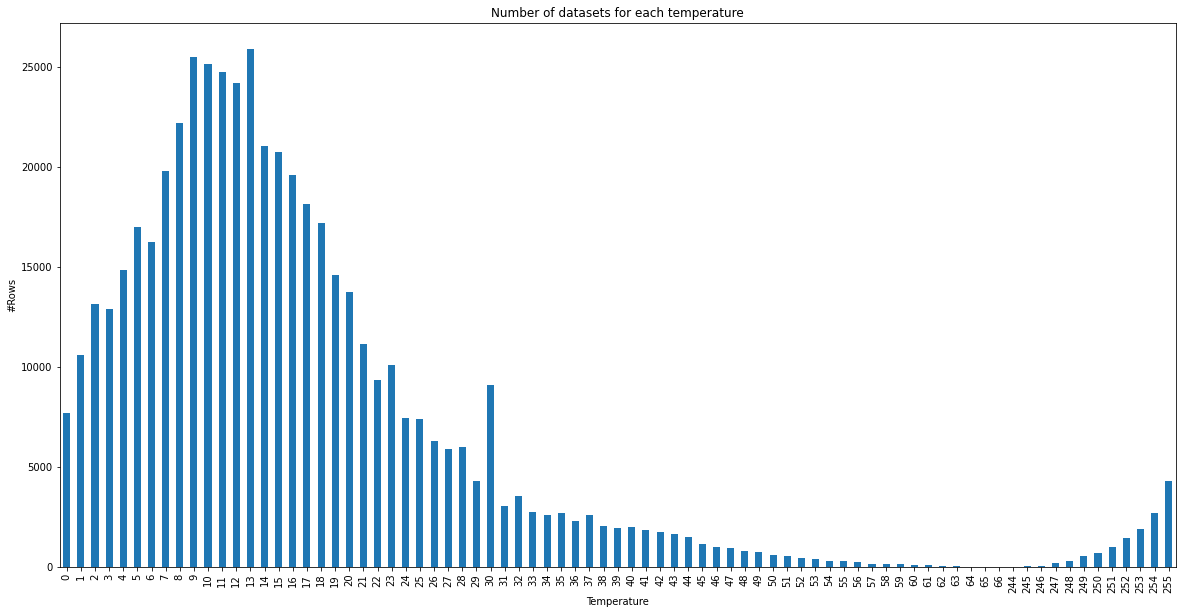

In [11]:
df_count = df_all_reduced.groupby(['decoded_data.sensor_data.Temperature']).size()
df_count = df_count.sort_index(ascending=True)
ax = df_count.plot.bar(xlabel='Temperature', ylabel='#Rows', figsize=(20,10), title='Number of datasets for each temperature')

Im QA hieß es, dass Default Wert 255 ist. Warum sind dann aber Werte von 244-254 vorhanden?

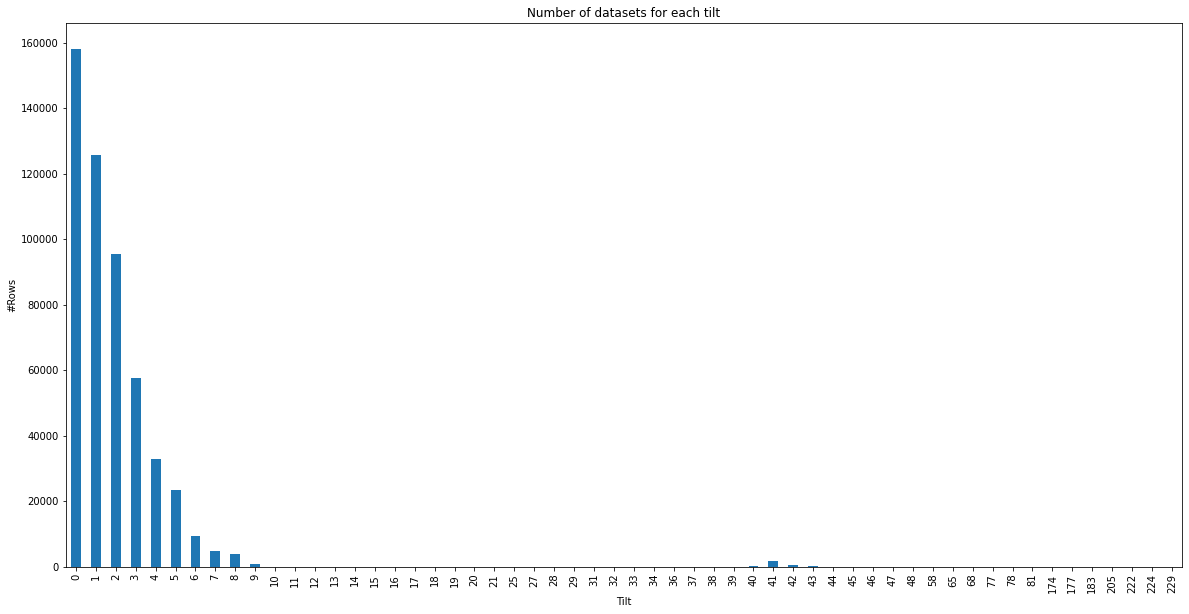

In [12]:
df_count = df_all_reduced.groupby(['decoded_data.sensor_data.Tilt']).size()
df_count = df_count.sort_index(ascending=True)
ax = df_count.plot.bar(xlabel='Tilt', ylabel='#Rows', figsize=(20,10), title='Number of datasets for each tilt')

Bis Neun Grad vermutlich akzeptabel. Die 40-43 sind wohl durch eine Messung während der Leerung entstanden.

# Export Data

In [13]:
df_all_reduced.to_csv('../data/preprocessed/cleaned_data.csv', index=False)